<h1>IMPORTS</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<h1>LOADING HALO CATALOGUE</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [3]:
#Load simulated halo catalogue
halos = np.load('Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_masses.npy')

## column ids
# 0  x (position in units of Mpc / h)
# 1  y (position in units of Mpc / h)
# 2  z (position in units of Mpc / h)
# 3  mass (units of Msun/h)

#check shape to make sure correct number of columns
print("Shape of array:", np.shape(halos))
print("\n")

###############################################################################
##COORDINATES
#Generate minimum and maximum values of coordinates
x_min=np.amin(halos[::1, 0])
x_max=np.amax(halos[::1, 0])
y_min=np.amin(halos[::1, 1])
y_max=np.amax(halos[::1, 1])
z_min=np.amin(halos[::1, 2])
z_max=np.amax(halos[::1, 2])

#Output minimum and maxmimum values of coordinates
print("x minimum:", x_min)
print("x maximum:", x_max)
print("y minimum:", y_min)
print("y maximum:", y_max)
print("z minimum:", z_min)
print("z maximum:", z_max)
print("\n")

#output box sizes
print("x box size:", x_max-x_min)
print("y box size:", y_max-y_min)
print("z box size:", z_max-z_min)
print("\n")

###############################################################################
##MASS
#generate minimum and maximum mass values
mass_min=np.amin(halos[::1, 3])
mass_max=np.amax(halos[::1, 3])

#output minimum and maximumm values of masses
print("minimum mass:", mass_min)
print("maximum mass:", mass_max)

#output ratio of least massive to most massive halo
print("maximum/minimum mass:", mass_max/mass_min)

Shape of array: (1410661, 4)


x minimum: -348.15985
x maximum: 348.15985
y minimum: -348.16
y maximum: 348.1599
z minimum: -348.15918
z maximum: 348.15997


x box size: 696.3197
y box size: 696.31995
z box size: 696.31915


minimum mass: 680002450000.0
maximum mass: 4321987700000000.0
maximum/minimum mass: 6355.8413


<h1>CUT HALOS BY COORDINATES (need to change later)</h1>

In [5]:
def select_objects_in_xyz_range(map_,x_min,x_max,y_min,y_max,z_min,z_max):
    x_ok = np.logical_and(map_[0] > x_min,map_[0] < x_max)
    y_ok  = np.logical_and(map_[1] > y_min,map_[1] < y_max)
    z_ok = np.logical_and(map_[2] > z_min,map_[2] < z_max)
    
    ok = np.where(np.logical_and.reduce([x_ok, y_ok, z_ok]))
    print(np.ravel(ok))
    return(np.ravel(ok))

halos_cut_sel=select_objects_in_xyz_range(halos,-300, 300, -300, 300, -300, 300)

print(halos_cut_sel)

#print(np.shape(halos_cut_sel))

#halos = np.transpose(halos)

#halos_cut=halos[halos_cut_sel]

#print(np.shape(halos_cut))
#print(halos_cut)

#print(halos_cut)

[0 2]
[0 2]


<h1>CUT HALOS BY MASS</h1>

In [7]:
#Define mass range selection function
def select_objects_in_mass_range(map_,mass_min,mass_max):
    mass_ok = np.logical_and(map_[3] > mass_min,map_[3] < mass_max)
    
    ok = np.where(np.logical_and.reduce([mass_ok]))
    return(np.ravel(ok))

#Selecting objects
halos_mass_cut_sel = select_objects_in_mass_range(halos.T,4.84050048*(10**14),4.32198774*(10**15))
halos_mass_cut=halos[halos_mass_cut_sel]

print("Shape of array:", np.shape(halos_mass_cut))
print("\n")

###############################################################################

#generate minimum and maximum mass values
mass_min_cut=np.amin(halos_mass_cut[::1, 3])
mass_max_cut=np.amax(halos_mass_cut[::1, 3])

#output minimum and maximumm values of masses
print("minimum mass:", mass_min_cut)
print("maximum mass:", mass_max_cut)

#output ratio of least massive to most massive halo
print("maximum/minimum mass:", mass_max_cut/mass_min_cut)

[      1    2656    5374    5375    5376    5377    8208   13683   22022
   24825   27745   27746   33539   33540   33541   36244   38930   38931
   41653   41654   49948   52563   60668   60669   63494   66065   68866
   74170   79892   79893   82765   85655   88483   93904   93908  105142
  107622  107623  110461  113408  116134  116137  118876  124521  127066
  127069  129706  132604  135491  138315  141157  141158  141159  143984
  146720  149276  149277  154902  165848  165849  165850  168696  168697
  168698  171437  179498  182312  182313  190657  201514  201515  201516
  207044  209603  212321  228691  228695  231351  234039  236758  236759
  239328  241990  245011  245012  252896  252897  255687  255688  255689
  255690  261062  263882  269369  275062  277972  283162  283163  283165
  283166  285941  285942  291448  297292  297293  302835  308398  311189
  311190  311191  313958  313961  319440  319441  319443  321985  321986
  321987  321988  324428  327234  335498  335499  3

<h1>3D POSITION PLOT OF HALOS</h1>

<Figure size 432x288 with 0 Axes>

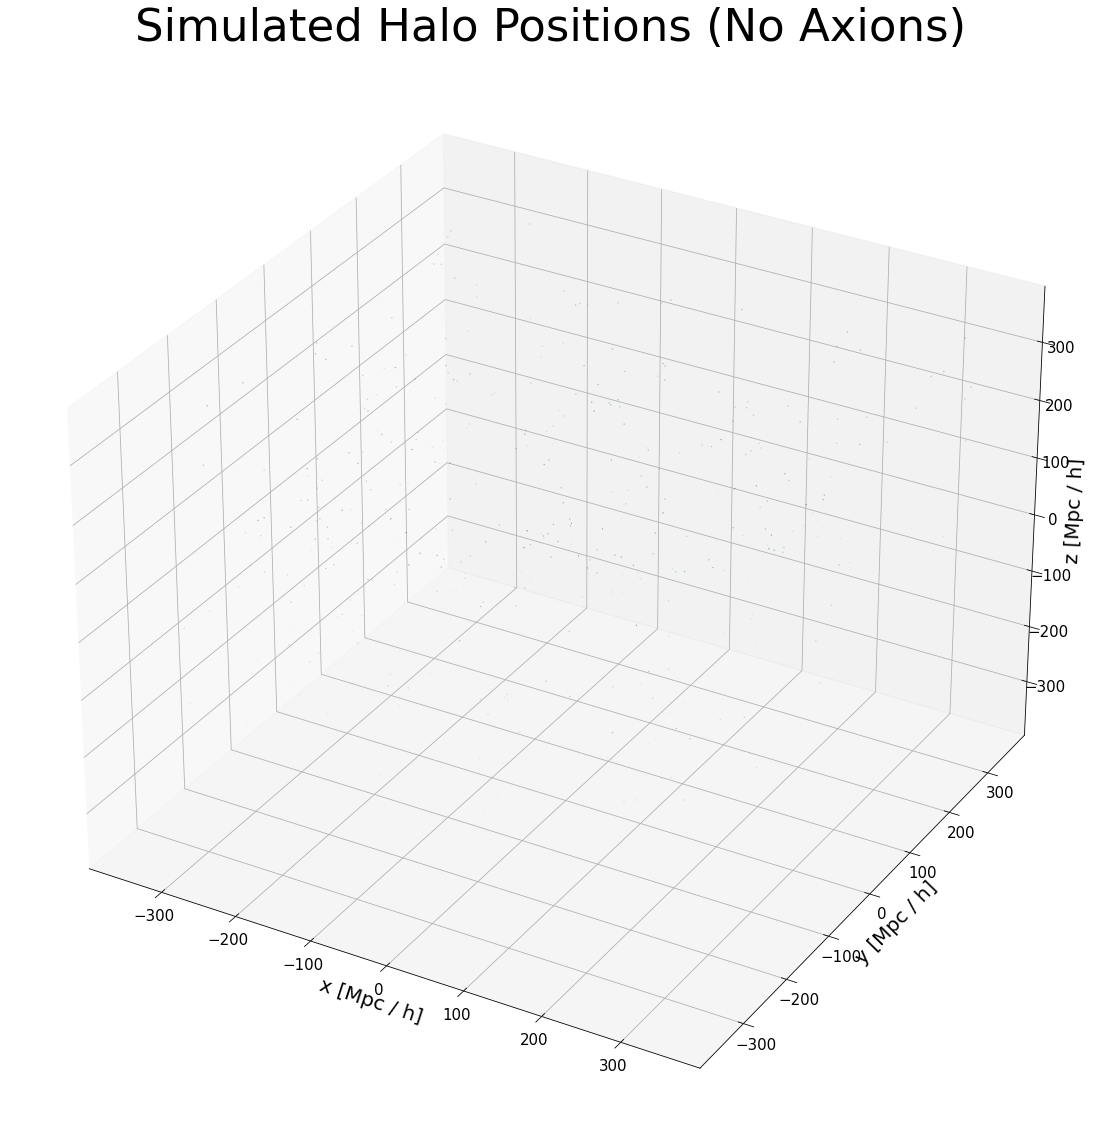

In [50]:
#3d visualization
fig = plt.figure()
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(halos_mass_cut[::1, 0], halos_mass_cut[::1, 1], halos_mass_cut[::1, 2], s=0.05, c=halos_mass_cut[::1, 2], cmap='Greens')
plt.title("Simulated Halo Positions (No Axions)", fontsize=45)

ax.set_xlabel('x [Mpc / h]', fontsize=20)
ax.set_ylabel('y [Mpc / h]', fontsize=20)
ax.set_zlabel('z [Mpc / h]', fontsize=20)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

<h1>SAVING HALOS CUT SELECTION FILE</h1>

In [51]:
np.save("HaloMassBin4_1_25_10",halos_mass_cut)

<h1>LOADING VOID CATALOGUE</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [54]:
#Load void catalogue
voids = np.loadtxt('1024box_mass_1_25_10zobov-Voids_cat.txt')

## column ids
# 0  voidID
# 1  x (position in units of Mpc / h)
# 2  y (position in units of Mpc / h)
# 3  z (position in units of Mpc / h)
# 4  R_eff (in units of Mpc / h)
# 5  delta_min
# 6  delta_avg
# 7  lambda_v
# 8  DensRatio

#check shape to make sure correct number of columns
print("Shape of array:", np.shape(voids))
print("\n")

voids[::1,1]=voids[::1,1]-348.16
voids[::1,2]=voids[::1,2]-348.16
voids[::1,3]=voids[::1,3]-348.16

###############################################################################
##COORDINATES
#Generate minimum and maximum values of coordinates
x_min_void=np.amin(voids[::1, 1])
x_max_void=np.amax(voids[::1, 1])
y_min_void=np.amin(voids[::1, 2])
y_max_void=np.amax(voids[::1, 2])
z_min_void=np.amin(voids[::1, 3])
z_max_void=np.amax(voids[::1, 3])

#Output minimum and maxmimum values of coordinates
print("x minimum:", x_min_void)
print("x maximum:", x_max_void)
print("y minimum:", y_min_void)
print("y maximum:", y_max_void)
print("z minimum:", z_min_void)
print("z maximum:", z_max_void)
print("\n")

#output box sizes
print("x box size:", x_max_void-x_min_void)
print("y box size:", y_max_void-y_min_void)
print("z box size:", z_max_void-z_min_void)
print("\n")

###############################################################################
##RADIUS
#generate minimum and maximum radius values
radius_min_void=np.amin(voids[::1,4])
radius_max_void=np.amax(voids[::1,4])

#output minimum and maximumm values of radii
print("minimum radius:", radius_min_void)
print("maximum radius:", radius_max_void)

#output ratio of largest to smallest void
print("maximum/minimum radius:", radius_max_void/radius_min_void)
print("\n")

###############################################################################
##DELTA AVG
#generate minimum and maximum delta_avg values
delta_avg_min_void=np.amin(voids[::1,6])
delta_avg_max_void=np.amax(voids[::1,6])

#output minimum and maximumm values of delta_avg
print("minimum delta_avg:", delta_avg_min_void)
print("maximum delta_avg:", delta_avg_max_void)

#output ratio of biggest to smallest value of delta_avg
print("maximum/minimum delta_avg:", delta_avg_max_void/delta_avg_min_void)
print("\n")

###############################################################################
##CALCULATIONS
#calculate mean density of universe
mean_density=(3*(0.68*100)**2)/(8*np.pi*6.6743*(10**-11))
print("The mean density is:", mean_density)

#calculate densities of voids
void_density=voids[::1, 6]*mean_density+mean_density
#print(void_density)

#calculate masses of voids
void_mass=(4/3)*np.pi*voids[::1, 4]**3*void_density
#print(void_mass)

###############################################################################
##DENSITY
#generate minimum and maximum density values
density_min_void=np.amin(void_density)
density_max_void=np.amax(void_density)

#output minimum and maximumm values of densities
print("minimum density:", density_min_void)
print("maximum density:", density_max_void)

#output ratio of most dense to least dense void
print("maximum/minimum density:", density_max_void/density_min_void)
print("\n")

###############################################################################
##MASS
#generate minimum and maximum mass values
mass_min_void=np.amin(void_mass)
mass_max_void=np.amax(void_mass)

#output minimum and maximumm values of masses
print("minimum mass:", mass_min_void)
print("maximum mass:", mass_max_void)

#output ratio of least massive to most massive halo
print("maximum/minimum mass:", mass_max_void/mass_min_void)

Shape of array: (6644, 9)


x minimum: -2698.407418
x maximum: 348.11067999999995
y minimum: -348.108876
y maximum: 348.05380999999994
z minimum: -632.6314910000001
z maximum: 348.120619


x box size: 3046.5180979999996
y box size: 696.1626859999999
z box size: 980.7521100000001


minimum radius: 5.076
maximum radius: 53.674
maximum/minimum radius: 10.574074074074074


minimum delta_avg: -0.62249
maximum delta_avg: 3.697506
maximum/minimum delta_avg: -5.939864094202317


The mean density is: 8269771251557.363
minimum density: 3121921345175.42
maximum density: 38847300072818.23
maximum/minimum density: 12.443394876956903


minimum mass: 9894238429921986.0
maximum mass: 4.0317714730452536e+18
maximum/minimum mass: 407.486791590997


<h1>CUT VOIDS BY COORDINATES</h1>

In [55]:
def select_objects_in_xyz_range(map_,x_min,x_max,y_min,y_max,z_min,z_max):
    x_ok = np.logical_and(map_[1] > x_min,map_[1] < x_max)
    y_ok  = np.logical_and(map_[2] > y_min,map_[2] < y_max)
    z_ok = np.logical_and(map_[3] > z_min,map_[3] < z_max)
    
    ok = np.where(np.logical_and.reduce([x_ok, y_ok, z_ok]))
    return(np.ravel(ok))

#Selecting objects
voids_xyz_cut_sel=select_objects_in_xyz_range(voids.T,-348.16, 348.16, -348.16, 348.16, -348.16, 348.16)
voids_xyz_cut=voids[voids_xyz_cut_sel]

print("Shape of array:", np.shape(voids_xyz_cut))
print("\n")

###############################################################################

#Generate minimum and maximum values of coordinates
x_min_void_cut=np.amin(voids_xyz_cut[::1, 1])
x_max_void_cut=np.amax(voids_xyz_cut[::1, 1])
y_min_void_cut=np.amin(voids_xyz_cut[::1, 2])
y_max_void_cut=np.amax(voids_xyz_cut[::1, 2])
z_min_void_cut=np.amin(voids_xyz_cut[::1, 3])
z_max_void_cut=np.amax(voids_xyz_cut[::1, 3])

#Output minimum and maxmimum values of coordinates
print("x minimum:", x_min_void_cut)
print("x maximum:", x_max_void_cut)
print("y minimum:", y_min_void_cut)
print("y maximum:", y_max_void_cut)
print("z minimum:", z_min_void_cut)
print("z maximum:", z_max_void_cut)
print("\n")

#output box sizes
print("x box size:", x_max_void_cut-x_min_void_cut)
print("y box size:", y_max_void_cut-y_min_void_cut)
print("z box size:", z_max_void_cut-z_min_void_cut)
print("\n")

Shape of array: (6643, 9)


x minimum: -348.05472100000003
x maximum: 348.11067999999995
y minimum: -348.108876
y maximum: 348.05380999999994
z minimum: -348.15799100000004
z maximum: 348.120619


x box size: 696.165401
y box size: 696.1626859999999
z box size: 696.2786100000001




<h1>3D POSITION PLOT OF VOIDS</h1>

<Figure size 432x288 with 0 Axes>

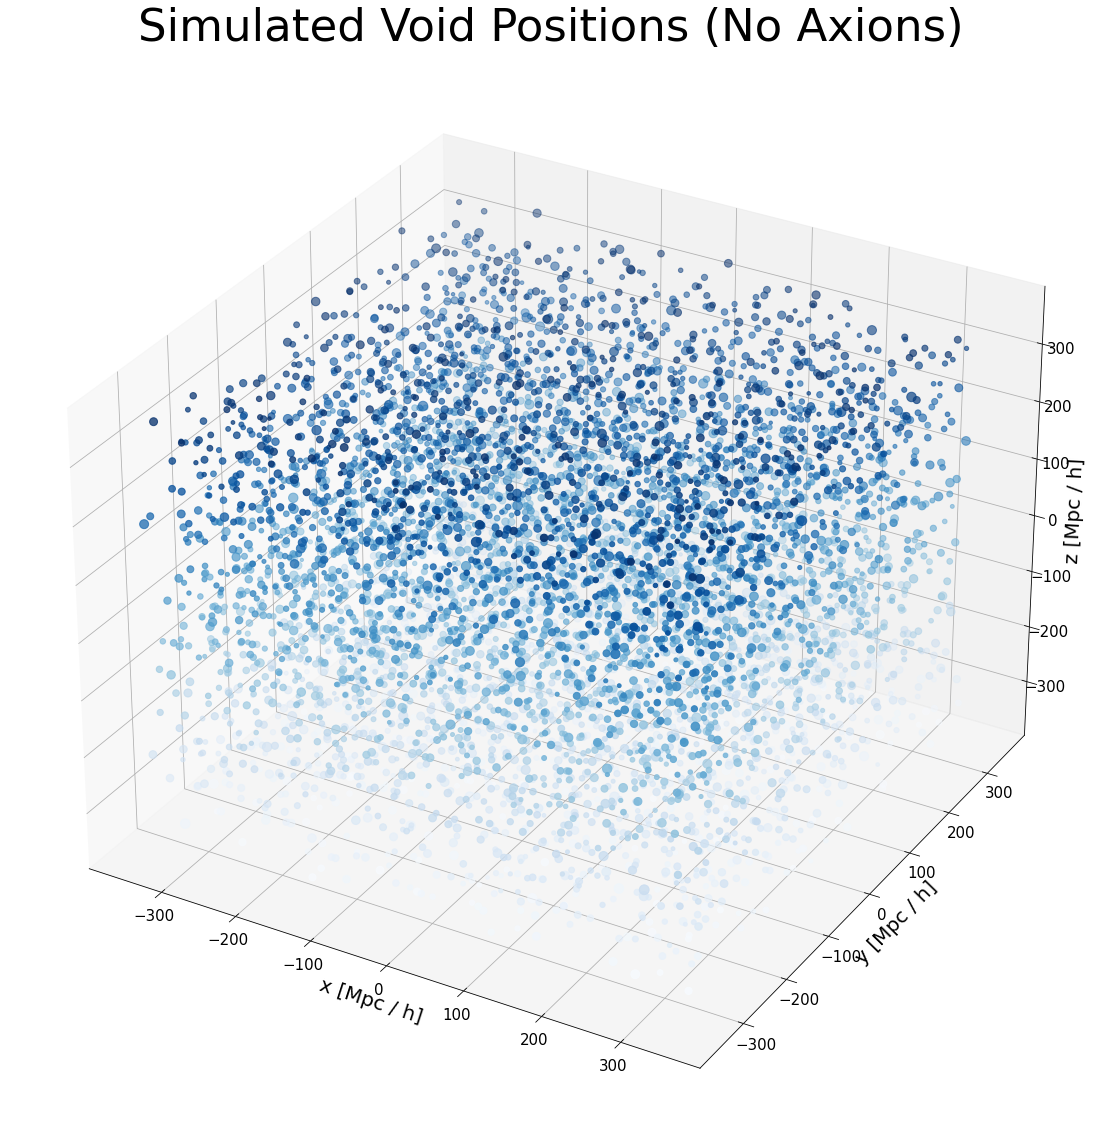

In [57]:
#3d visualization
fig = plt.figure()
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(voids_xyz_cut[::1, 1], voids_xyz_cut[::1, 2], voids_xyz_cut[::1, 3], s=voids_xyz_cut[::1, 4]*2, c=voids_xyz_cut[::1, 3], cmap='Blues')
#ax.scatter3D(halos[::1, 0], halos[::1, 1], halos[::1, 2], s=0.05, c=halos[::1, 2], cmap='Greens')
plt.title("Simulated Void Positions (No Axions)", fontsize=45)

ax.set_xlabel('x [Mpc / h]', fontsize=20)
ax.set_ylabel('y [Mpc / h]', fontsize=20)
ax.set_zlabel('z [Mpc / h]', fontsize=20)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

<h1>SAVING VOIDS CUT SELECTION FILE</h1>

In [59]:
np.save("Voids_No_Outliers_1_25_10",voids_xyz_cut)